### tsdGAN: A generative adversarial network approach for removing electrocardiographic interference from electromyographic signals 
Lucas Haberkamp<sup>1,2</sup>, Charles A. Weisenbach<sup>1</sup>, Peter Le<sup>3</sup>  
<sup>1</sup>Naval Medical Research Unit Dayton, Wright-Patterson Air Force Base, OH, USA   
<sup>2</sup>Leidos, Reston, VA, USA   
<sup>3</sup>Air Force Research Laboratory, 711th Human Performance Wing, Wright-Patterson Air Force Base, OH, USA 

#### This notebook is used to evaluate the tsdGAN model

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf

Load in synthetic validation dataset

In [7]:
with open('../../Data/Preprocessed Data/Synthetic/Validation/x_val.pkl', 'rb') as f:
  x_val = pickle.load(f)

with open('../../Data/Preprocessed Data/Synthetic/Validation/y_val.pkl', 'rb') as f:
  y_val = pickle.load(f)

with open('../../Data/Preprocessed Data/Synthetic/Validation/label_val.pkl', 'rb') as f:
  label_val = pickle.load(f)

In [8]:
model = tf.keras.models.load_model("../../Models/Synthetic/synthetic_generator_epoch150.h5", compile=False)

2024-02-13 06:28:35.997623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


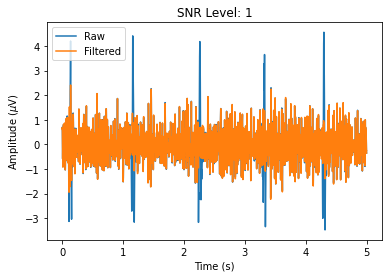

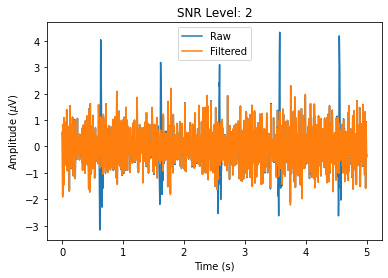

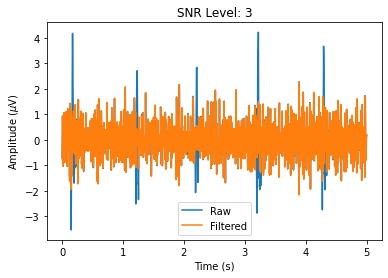

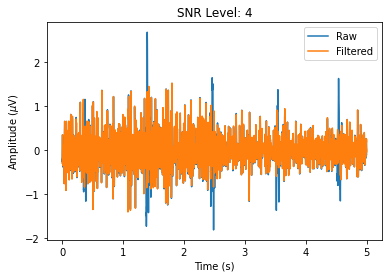

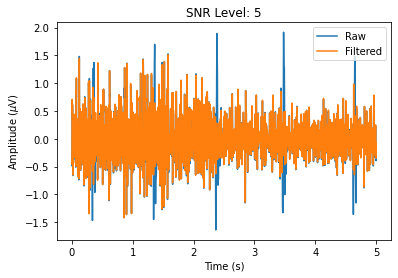

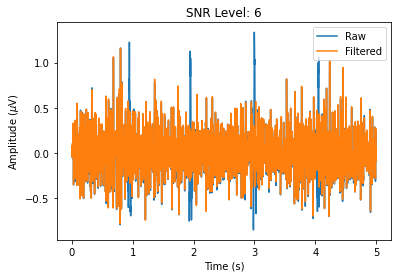

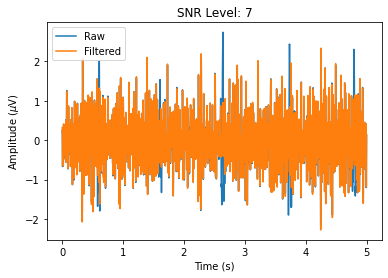

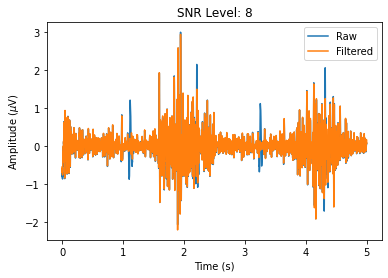

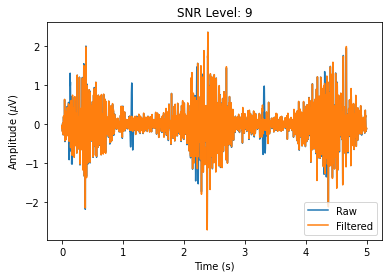

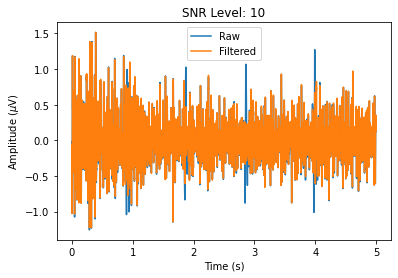

In [9]:
# Define time axis
Fs = 2148
t = np.arange(len(x_val[1][0]))/Fs

y_pred = {}
for _, key in enumerate(x_val.keys()):
    # Apply tsdGAN
    y_pred[key] = model.predict(x_val[key], batch_size=32).squeeze()
    
    # Generate plot for each SNR level
    plt.plot(t, x_val[key][0], label='Raw')
    plt.plot(t, y_pred[key][0], label='Filtered')
    plt.ylabel("Amplitude ($\mu$V)")
    plt.xlabel("Time (s)")
    plt.legend()
    plt.title(f"SNR Level: {key}")
    plt.show()

In [10]:
with open('../../Data/Synthetic Predictions/tsdGAN.pkl', 'wb') as f:
    pickle.dump(y_pred, f)